In [20]:
import pandas as pd
import numpy as np
import re

%matplotlib inline
import matplotlib.pyplot as plt

In [21]:
class route(object):
    def __init__(self):
        self.db = pd.DataFrame()
        self.df_graph = pd.DataFrame()
        #distance from point to point
        self.pp_distance = pd.DataFrame()
        self.new_df = pd.DataFrame()
    
    def read_data(self, f):
        self.f = f
        lat = []
        lon = []
        ele = []
        with open(f, 'r') as f:
            y = f.read()
        for lat_v in re.findall(r'\slat="([\-\d\.]+)"', y):
            lat.append(float(lat_v))
        for long_v in re.findall(r'\slon="([\-\d\.]+)"', y):
            lon.append(float(long_v))
        for ele_v in re.findall(r'<ele>([\-\d\.]+)</ele>', y):
            ele.append(float(ele_v))
        self.db['X'] = lon
        self.db['Y'] = lat
        self.db['ele'] = ele
    
    def ptdistance(self):
        from math import sin, cos, sqrt, degrees, radians, asin, acos
        #earth radius (mi)
        r = 3958.8
        pp_distance = []
        #inverse haversine
        for a in range (0,self.db.shape[0]-1):
            lat1 = radians(self.db.loc[a]['Y'])
            lat2 = radians(self.db.loc[a+1]['Y'])
            long1 = radians(self.db.loc[a]['X'])
            long2 = radians(self.db.loc[a+1]['X'])
            urad1 = sin((lat2-lat1)/2)**2
            urad2 = cos(lat1) * cos(lat2) * sin((long2-long1)/2)**2
            dis = 2 * r * asin(sqrt(urad1 + urad2))
            pp_distance.append(dis)
        self.pp_distance['d'] = pp_distance
        
    def ttldistance(self):
        dorstance = []
        dorstance.append(self.pp_distance.loc[0]['d'])
        dorstance.append(self.pp_distance.loc[0]['d'] + self.pp_distance.loc[1]['d'])
        for a in range (2,self.db.shape[0]-1):
            dorstance.append(dorstance[a-1] + self.pp_distance.loc[a]['d'])
        self.df_graph['distance'] = dorstance

    def ele(self):
        eleva=[]
        for a in range (0, self.db.shape[0]-1):
            ele1 = self.db.loc[a]['ele']
            ele2 = self.db.loc[a+1]['ele']
            avg = (ele1 + ele2) / 2
            eleva.append(avg)
        self.df_graph['elevation'] = eleva
        
    def graph_prep(self):
        self.ptdistance()
        self.ttldistance()
        self.ele()
        return self.df_graph
    
    def get_graph(self, npts):
        dist = self.df_graph['distance'].values.reshape(-1,)
        elv = self.df_graph['elevation'].values
        from scipy.interpolate import make_interp_spline, BSpline
        self.xnew = np.linspace(dist.min(),dist.max(),npts) #300 represents number of points to make between T.min and T.max
        spl = make_interp_spline(dist, elv, k=1) #BSpline object
        self.power_smooth = spl(self.xnew)
        plt.plot(self.xnew,self.power_smooth, color = 'orange')
        title_name = re.search(r'([\w_]*)\.', self.f).group()
        plt.title(title_name)
        plt.show()
    
    def get_inter_data(self):
        self.new_df['Distance'] = self.xnew
        self.new_df['Elevation'] = self.power_smooth
        return self.new_df

In [22]:
class connect_routes(object):
    def __init__(self, f1, f2):
        self.f1 = f1
        self.f2 = f2
        self.r1 = route()
        self.r1.read_data(f1)
        df_r1 = self.r1.graph_prep()
        self.r2 = route()
        self.r2.read_data(f2)
        d1 = self.r1.db
        d2 = self.r2.db
        d1 = d1.append(d2)
        d1.reset_index(inplace = True, drop = True)
        self.result = route()
        self.result.f = re.findall(r'^([\w_]+)\.', f1)[0] + re.findall(r'(_[\w]+)\.', f2)[0] + '.gpx'
        self.result.db = d1
        df_result = self.result.graph_prep()
        
    def get_graph(self):
        self.result.get_graph(20)
        
    def save_data(self):
        self.result_ndf = self.result.get_inter_data()
        self.result_ndf.to_csv(re.findall(r'^([\w_]+)\.', self.f1)[0] + re.findall(r'(_[\w]+)\.', self.f2)[0] + '.csv')

In [23]:
print(f1)

NameError: name 'f1' is not defined

## Boelter

### Hedrick_Cross_Boelter

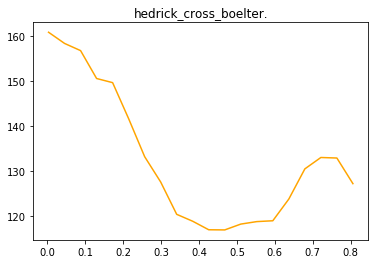

In [24]:
hedrick_cross_boelter = connect_routes('hedrick_cross.gpx', "cross_boelter.gpx")
hedrick_cross_boelter.get_graph()
hedrick_cross_boelter.save_data()

In [26]:
f = 'cross_boelter.gpx'
lat = []
lon = []
ele = []
with open(f, 'r') as f:
    y = f.read()
for lat_v in re.findall(r'\slat="([\-\d\.]+)"', y):
    lat.append(float(lat_v))
for long_v in re.findall(r'\slon="([\-\d\.]+)"', y):
    lon.append(float(long_v))
print(len(lat))
print(len(lon))
print(len(ele))

44
44
0


In [28]:
for ele_v in re.findall(r'<ele>([\-\d\.]+)</ele>', y):
    ele.append(float(ele_v))
print(len(ele))  

44


In [29]:
ele

[128.8,
 128.0,
 126.8,
 122.0,
 122.2,
 118.0,
 122.0,
 118.0,
 118.0,
 118.0,
 116.0,
 118.0,
 117.0,
 115.9,
 116.9,
 118.1,
 118.5,
 118.0,
 118.0,
 118.0,
 120.0,
 118.0,
 120.0,
 120.0,
 124.0,
 124.0,
 126.0,
 126.0,
 128.3,
 131.0,
 132.0,
 130.0,
 132.0,
 133.0,
 133.2,
 135.1,
 131.0,
 131.8,
 133.4,
 128.0,
 127.0,
 130.2,
 127.1,
 127.4]

### Rieber_Cross_Boelter

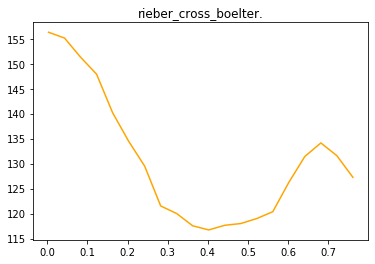

In [30]:
rieber_cross_boelter = connect_routes('rieber_cross.gpx', "cross_boelter.gpx")
rieber_cross_boelter.get_graph()
rieber_cross_boelter.save_data()

### Hedrick_Cross_Tennis_Boelter

In [31]:
rieber_cross_tennis_boelter = connect_routes('rieber_cross.gpx', "cross_tennis_boelter.gpx")
rieber_cross_tennis_boelter.get_graph()
rieber_cross_tennis_boelter.save_data()

FileNotFoundError: [Errno 2] No such file or directory: 'cross_tennis_boelter.gpx'

## Target

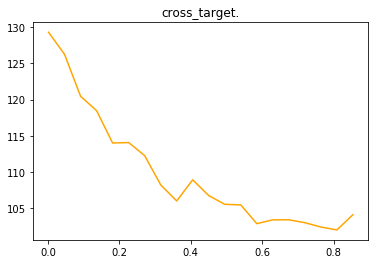

In [12]:
cross_target = route()
cross_target.read_data('cross_target.gpx')
df_cross_target = cross_target.graph_prep()
df_cross_target.head()
cross_target.get_graph(20)

### Rieber_Cross_Target

In [32]:
d1 = rieber_cross.db
d2 = cross_target.db
d1 = d1.append(d2)
d1.reset_index(inplace = True, drop = True)
d1.head()

NameError: name 'rieber_cross' is not defined

In [33]:
rieber_cross_target = route()
rieber_cross_target.f = 'rieber_cross_target.gpx'
rieber_cross_target.db = d1
df_rieber_cross_target = rieber_cross_target.graph_prep()
rieber_cross_target.get_graph(20)
rieber_cross_target_ndf = rieber_cross_target.get_inter_data()
rieber_cross_target_ndf.to_csv('rieber_cross_boelter_ndf.csv')
rieber_cross_target_ndf.to_csv('rieber_cross_target.csv')

NameError: name 'd1' is not defined

### Hedrick_Cross_Target

In [11]:
d1 = hedrick_cross.db
d2 = cross_target.db
d1 = d1.append(d2)
d1.reset_index(inplace = True, drop = True)
d1.head()

,X,Y,ele
0,-118.452011,34.073297,161.2
1,-118.452026,34.073353,160.6
2,-118.451857,34.073079,159.3
3,-118.451839,34.073024,158.9
4,-118.451836,34.072936,158.0


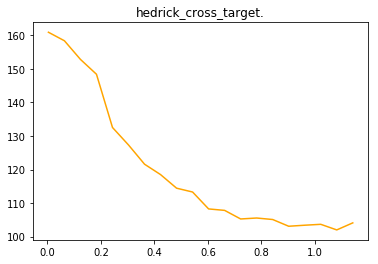

In [12]:
hedrick_cross_target = route()
hedrick_cross_target.f = 'hedrick_cross_target.gpx'
hedrick_cross_target.db = d1
df_hedrick_cross_target = hedrick_cross_target.graph_prep()
hedrick_cross_target.get_graph(20)
hedrick_cross_target_ndf = hedrick_cross_target.get_inter_data()
hedrick_cross_target_ndf.to_csv('hedrick_cross_target.csv')

## Powell

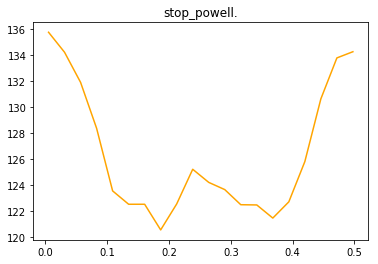

In [13]:
stop_powell = route()
stop_powell.read_data('stop_powell.gpx')
df_stop_powell = stop_powell.graph_prep()
df_stop_powell.head()
stop_powell.get_graph(20)

### Sproul_Stop_Powell

In [14]:
sproul_stop = route()
sproul_stop.read_data('sproul_stop.gpx')
d1 = sproul_stop.db
d2 = stop_powell.db
d1 = d1.append(d2)
d1.reset_index(inplace = True, drop = True)
d1.head()

,X,Y,ele
0,-118.450505,34.071501,141.6
1,-118.450507,34.071577,142.2
2,-118.450528,34.071634,141.0
3,-118.450722,34.071972,144.2
4,-118.450744,34.072024,144.0


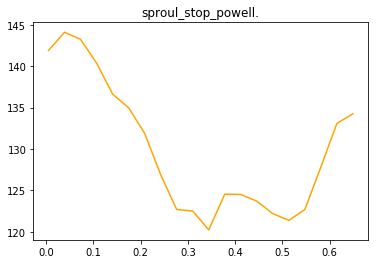

In [15]:
sproul_stop_powell = route()
sproul_stop_powell.f = 'sproul_stop_powell.gpx'
sproul_stop_powell.db = d1
df_sproul_stop_powell = sproul_stop_powell.graph_prep()
sproul_stop_powell.get_graph(20)
sproul_stop_powell_ndf = sproul_stop_powell.get_inter_data()
sproul_stop_powell_ndf.to_csv('sproul_stop_powell.csv')

## Sculpture

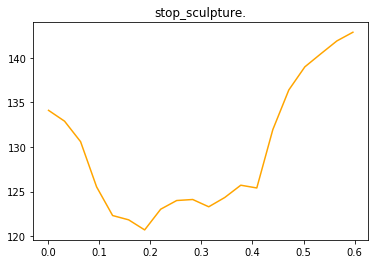

In [16]:
stop_sculpture = route()
stop_sculpture.read_data('stop_sculpture.gpx')
df_stop_sculpture = stop_sculpture.graph_prep()
df_stop_sculpture.head()
stop_sculpture.get_graph(20)

### Sproul_Stop_Sculpture

In [17]:
d1 = sproul_stop.db
d2 = stop_sculpture.db
d1 = d1.append(d2)
d1.reset_index(inplace = True, drop = True)
d1.head()

,X,Y,ele
0,-118.450505,34.071501,141.6
1,-118.450507,34.071577,142.2
2,-118.450528,34.071634,141.0
3,-118.450722,34.071972,144.2
4,-118.450744,34.072024,144.0


In [1]:
sproul_stop_sculpture = route()
sproul_stop_sculpture.f = 'sproul_stop_sculpture.gpx'
sproul_stop_sculpture.db = d1
df_sproul_stop_sculpture = sproul_stop_sculpture.graph_prep()
sproul_stop_sculpture.get_graph(20)
sproul_stop_sculpture_ndf = sproul_stop_sculpture.get_inter_data()
sproul_stop_sculpture_ndf.to_csv('sproul_stop_sculpture.csv')

NameError: name 'route' is not defined

## Others

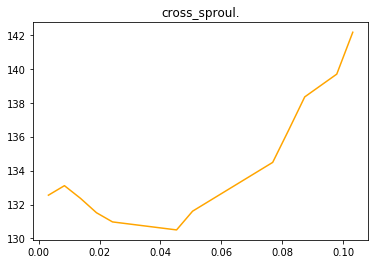

In [19]:
cross_sproul = route()
cross_sproul.read_data('cross_sproul.gpx')
df_cross_sproul = cross_sproul.graph_prep()
df_cross_sproul.head()
cross_sproul.get_graph(20)

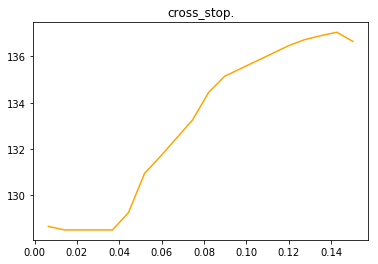

In [20]:
cross_stop = route()
cross_stop.read_data('cross_stop.gpx')
df_cross_stop = cross_stop.graph_prep()
df_cross_stop.head()
cross_stop.get_graph(20)

In [21]:
d1 = boelter_cross.db

NameError: name 'boelter_cross' is not defined

In [ ]:
d2 = cross_sproul.db

In [ ]:
d1.append(d2)
d1.reset_index(inplace = True, drop = True)
try:
    d1 = d1.drop(['level_0','index'], axis = 1)
except:
    pass
boelter_sproul = route()
boelter_sproul.f = 'boelter_sproul.gpx'
boelter_sproul.db = d1
df_boelter_sproul = boelter_sproul.graph_prep()
boelter_sproul.get_graph(20)